<a href="https://colab.research.google.com/github/ParkJongHyeok99/Data_Analysis_Airbnb/blob/main/Data_Analysis_Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

google colab 연동 및 데이터 전처리

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

source_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/nyc-rolling-sales.csv')
source_data.shape

(84548, 22)

In [ ]:
delete_columns_data = source_data.drop(['Unnamed: 0', 'BLOCK', 'LOT', 'EASE-MENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'BUILDING CLASS AT TIME OF SALE', 'SALE DATE', 'NEIGHBORHOOD', 'TAX CLASS AT PRESENT'], axis=1)
delete_columns_data.shape

(84548, 9)

In [ ]:
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    84548 non-null  int64 
 1   BUILDING CLASS CATEGORY    84548 non-null  object
 2   BUILDING CLASS AT PRESENT  84548 non-null  object
 3   TOTAL UNITS                84548 non-null  int64 
 4   LAND SQUARE FEET           84548 non-null  object
 5   GROSS SQUARE FEET          84548 non-null  object
 6   YEAR BUILT                 84548 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  84548 non-null  int64 
 8   SALE PRICE                 84548 non-null  object
dtypes: int64(4), object(5)
memory usage: 5.8+ MB


In [ ]:
# '-'가 있는 행 찾기
rows_with_minus_sign = delete_columns_data[delete_columns_data.apply(lambda row: ' -  ' in row.values, axis=1)]

# 해당 행을 삭제
delete_columns_data = delete_columns_data.drop(rows_with_minus_sign.index)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48244 entries, 0 to 84547
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  object
 5   GROSS SQUARE FEET          48244 non-null  object
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  object
dtypes: int64(4), object(5)
memory usage: 3.7+ MB


In [ ]:
# 구간 변수 TOTAL UNITS, LAND SQUARE FEET, GROSS SQUARE FEET, YEAR BUILT, SALE PRICE  (5)

# 구간 변수 타입 변경
delete_columns_data['LAND SQUARE FEET'] = delete_columns_data['LAND SQUARE FEET'].astype(int)
delete_columns_data['GROSS SQUARE FEET'] = delete_columns_data['GROSS SQUARE FEET'].astype(int)
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

In [ ]:
# 범주형 변수 BOROUGH, BUILDING CLASS CATEGORY, BUILDING CLASS AT PRESENT, TAX CLASS AT TIME OF SALE, PRICE_B (5)

# 타겟 변수 값이 중위수 이상이면 1, 아니면 0
# 이진값 타겟 변수 PRICE_B
c1 = delete_columns_data['SALE PRICE'] >= delete_columns_data['SALE PRICE'].median()
c0 = delete_columns_data['SALE PRICE'] < delete_columns_data['SALE PRICE'].median()

delete_columns_data.loc[c1, "PRICE_B"] = 1
delete_columns_data.loc[c0, "PRICE_B"] = 0
delete_columns_data.head(3)

,BOROUGH,BUILDING CLASS CATEGORY,BUILDING CLASS AT PRESENT,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,PRICE_B
0,1,07 RENTALS - WALKUP APARTMENTS,C2,5,1633,6440,1900,2,6625000,1.0
3,1,07 RENTALS - WALKUP APARTMENTS,C4,10,2272,6794,1913,2,3936272,1.0
4,1,07 RENTALS - WALKUP APARTMENTS,C2,6,2369,4615,1900,2,8000000,1.0


In [ ]:
delete_columns_data.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv', index=False)

타겟 변수 설정

In [ ]:
# SALE PRICE 변수 object에서 float로 변환
import pandas as pd

delete_columns_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/delete_columns_data.csv')
delete_columns_data['SALE PRICE'] = delete_columns_data['SALE PRICE'].astype(int)

delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BOROUGH                    48244 non-null  int64  
 1   BUILDING CLASS CATEGORY    48244 non-null  object 
 2   BUILDING CLASS AT PRESENT  48244 non-null  object 
 3   TOTAL UNITS                48244 non-null  int64  
 4   LAND SQUARE FEET           48244 non-null  int64  
 5   GROSS SQUARE FEET          48244 non-null  int64  
 6   YEAR BUILT                 48244 non-null  int64  
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64  
 8   SALE PRICE                 48244 non-null  int64  
 9   PRICE_B                    48244 non-null  float64
dtypes: float64(1), int64(7), object(2)
memory usage: 3.7+ MB


In [ ]:
delete_columns_data['PRICE_B'] = delete_columns_data['PRICE_B'].astype('object')
delete_columns_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48244 entries, 0 to 48243
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    48244 non-null  int64 
 1   BUILDING CLASS CATEGORY    48244 non-null  object
 2   BUILDING CLASS AT PRESENT  48244 non-null  object
 3   TOTAL UNITS                48244 non-null  int64 
 4   LAND SQUARE FEET           48244 non-null  int64 
 5   GROSS SQUARE FEET          48244 non-null  int64 
 6   YEAR BUILT                 48244 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  48244 non-null  int64 
 8   SALE PRICE                 48244 non-null  int64 
 9   PRICE_B                    48244 non-null  object
dtypes: int64(7), object(3)
memory usage: 3.7+ MB


이상값 제거(구간 변수)

<Axes: xlabel='SALE PRICE'>

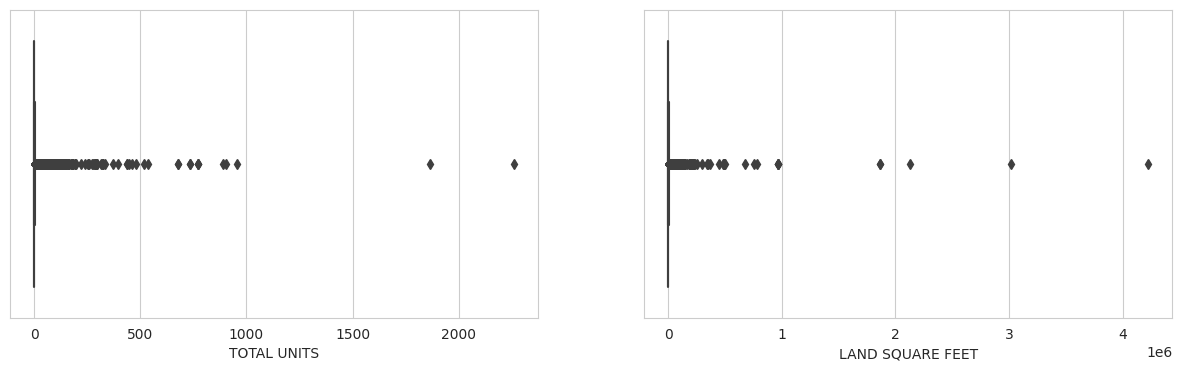

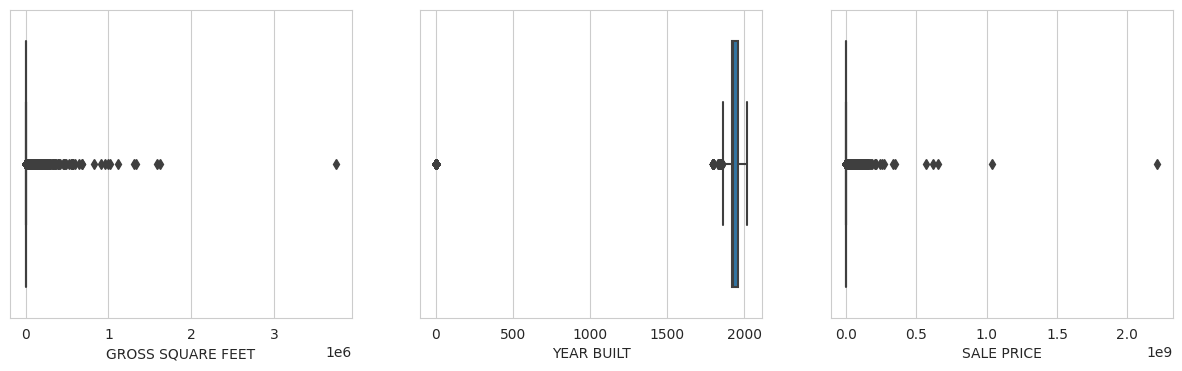

In [ ]:
# 구간 변수 이상값 확인 및 제거

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'TOTAL UNITS', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'LAND SQUARE FEET', data = delete_columns_data)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'GROSS SQUARE FEET', data = delete_columns_data)
sns.boxplot(ax = axes[1], x = 'YEAR BUILT', data = delete_columns_data)
sns.boxplot(ax = axes[2], x = 'SALE PRICE', data = delete_columns_data)

In [ ]:
Q1 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.25)
Q3 = delete_columns_data[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

TOTAL UNITS               1.0
LAND SQUARE FEET       1658.0
GROSS SQUARE FEET      1692.0
YEAR BUILT               41.0
SALE PRICE           749580.0
dtype: float64


In [ ]:
Lower = Q1 - 1.5 * IQR
Upper = Q3 + 1.5 * IQR
print(Lower)
print(Upper)

TOTAL UNITS               -0.5
LAND SQUARE FEET       -1074.0
GROSS SQUARE FEET      -1710.0
YEAR BUILT              1858.5
SALE PRICE          -1043950.0
dtype: float64
TOTAL UNITS                3.5
LAND SQUARE FEET        5558.0
GROSS SQUARE FEET       5058.0
YEAR BUILT              2022.5
SALE PRICE           1954370.0
dtype: float64


In [ ]:
c1 = (delete_columns_data['TOTAL UNITS'] >= -0.5) & (delete_columns_data['TOTAL UNITS'] <= 3.5)
c2 = (delete_columns_data['LAND SQUARE FEET'] >= -1074.0) & (delete_columns_data['LAND SQUARE FEET'] <= 5558.0)
c3 = (delete_columns_data['GROSS SQUARE FEET'] >= -1710.0) & (delete_columns_data['GROSS SQUARE FEET'] <= 5058.0)
c4 = (delete_columns_data['YEAR BUILT'] >= 1858.5) & (delete_columns_data['YEAR BUILT'] <= 2022.5)
c5 = (delete_columns_data['SALE PRICE'] >= -1043950.0) & (delete_columns_data['SALE PRICE'] <= 1954370.0)

df = delete_columns_data[c1 & c2 & c3 & c4 & c5]
df.shape

(37237, 10)

In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv', index=False)

탐색적 자료 분석 및 시각화

결측값이 50% 초과인 변수 제거

In [ ]:
import pandas as pd


preprocessing_completed = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')
preprocessing_completed['PRICE_B'] = preprocessing_completed['PRICE_B'].astype('object')
preprocessing_completed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    37237 non-null  int64 
 1   BUILDING CLASS CATEGORY    37237 non-null  object
 2   BUILDING CLASS AT PRESENT  37237 non-null  object
 3   TOTAL UNITS                37237 non-null  int64 
 4   LAND SQUARE FEET           37237 non-null  int64 
 5   GROSS SQUARE FEET          37237 non-null  int64 
 6   YEAR BUILT                 37237 non-null  int64 
 7   TAX CLASS AT TIME OF SALE  37237 non-null  int64 
 8   SALE PRICE                 37237 non-null  int64 
 9   PRICE_B                    37237 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.8+ MB


구간 변수 요약 통계 검토

In [ ]:
interval_variable = preprocessing_completed[['TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT', 'SALE PRICE']]
interval_variable.describe()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,37237.000000,37237.000000,37237.000000,37237.000000,3.723700e+04
mean,1.439831,2079.937562,1525.097672,1946.865027,4.908181e+05
std,0.819393,1393.243339,1051.142158,34.036405,4.103516e+05
min,0.000000,0.000000,0.000000,1865.000000,0.000000e+00
25%,1.000000,1417.000000,960.000000,1920.000000,1.400000e+05
50%,1.000000,2017.000000,1536.000000,1937.000000,4.598000e+05
75%,2.000000,2850.000000,2200.000000,1965.000000,7.250000e+05
max,3.000000,5554.000000,5025.000000,2017.000000,1.950000e+06


In [ ]:
# 구간 변수 왜도 확인
interval_variable.skew()

TOTAL UNITS          0.232459
LAND SQUARE FEET     0.071409
GROSS SQUARE FEET    0.174275
YEAR BUILT           0.623273
SALE PRICE           0.794076
dtype: float64

In [ ]:
# 첨도 확인
interval_variable.kurtosis()

TOTAL UNITS         -0.468185
LAND SQUARE FEET    -0.530130
GROSS SQUARE FEET   -0.361035
YEAR BUILT          -0.710494
SALE PRICE           0.445970
dtype: float64

구간 변수 상관관계 검토

In [ ]:
round(interval_variable.corr(), 2)

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
TOTAL UNITS,1.00,0.38,0.75,-0.19,0.09
LAND SQUARE FEET,0.38,1.00,0.59,-0.25,0.10
GROSS SQUARE FEET,0.75,0.59,1.00,-0.29,0.08
YEAR BUILT,-0.19,-0.25,-0.29,1.00,0.01
SALE PRICE,0.09,0.10,0.08,0.01,1.00


구간 변수 기초 통계량 및 시각화

기초 통계량

In [ ]:
interval_variable.describe()

,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,37237.000000,37237.000000,37237.000000,37237.000000,3.723700e+04
mean,1.439831,2079.937562,1525.097672,1946.865027,4.908181e+05
std,0.819393,1393.243339,1051.142158,34.036405,4.103516e+05
min,0.000000,0.000000,0.000000,1865.000000,0.000000e+00
25%,1.000000,1417.000000,960.000000,1920.000000,1.400000e+05
50%,1.000000,2017.000000,1536.000000,1937.000000,4.598000e+05
75%,2.000000,2850.000000,2200.000000,1965.000000,7.250000e+05
max,3.000000,5554.000000,5025.000000,2017.000000,1.950000e+06


시각화 - 박스 플롯으로 변수의 분포 확인

<Axes: xlabel='SALE PRICE'>

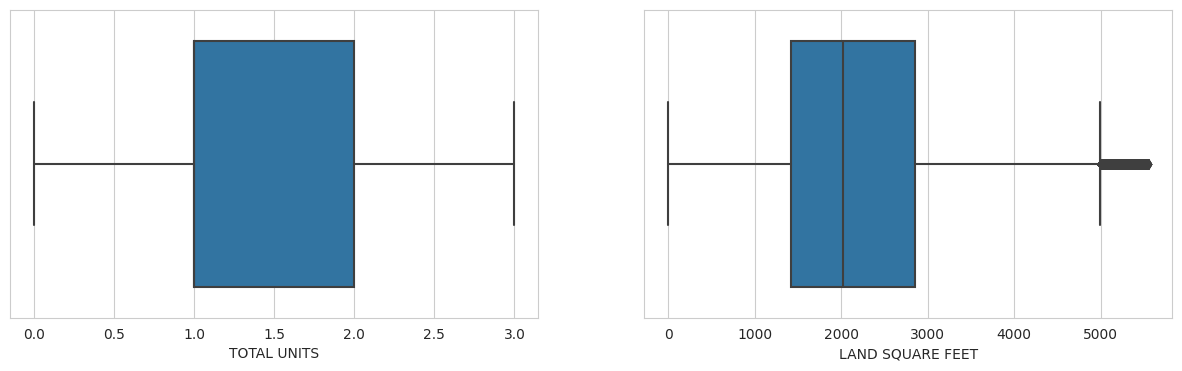

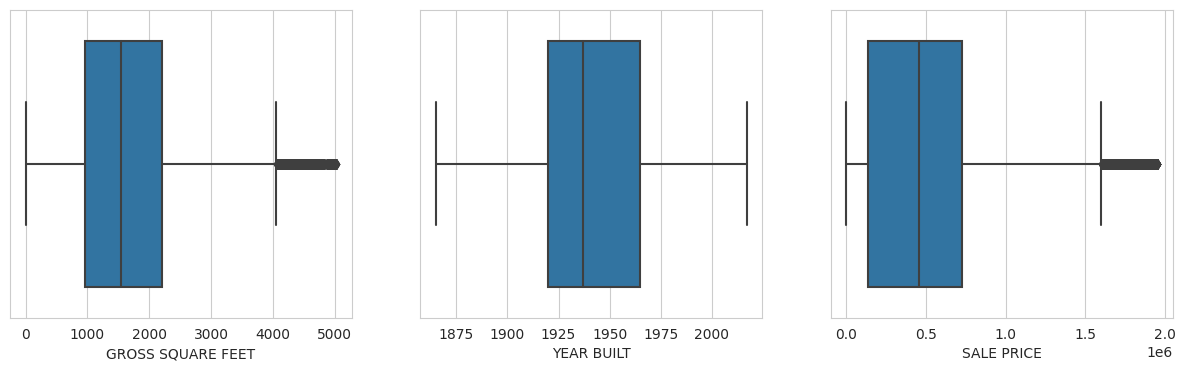

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'TOTAL UNITS', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'LAND SQUARE FEET', data = interval_variable)

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.boxplot(ax = axes[0], x = 'GROSS SQUARE FEET', data = interval_variable)
sns.boxplot(ax = axes[1], x = 'YEAR BUILT', data = interval_variable)
sns.boxplot(ax = axes[2], x = 'SALE PRICE', data = interval_variable)

시각화2 - 히트맵으로 상관계수 관계 확인

<Axes: >

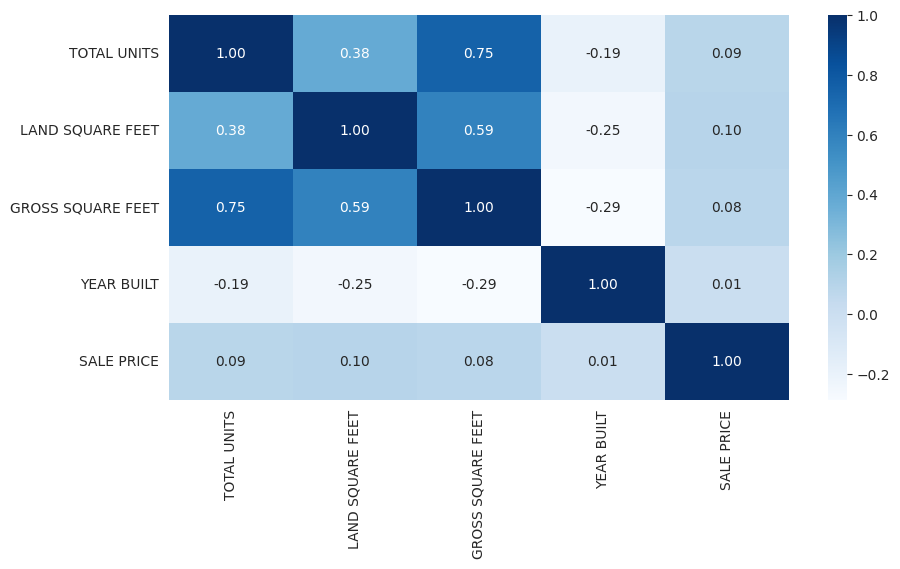

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(interval_variable.corr(), annot=True, fmt=".2f", cmap="Blues")

범주형 변수 시각화

시각화 3 - 막대그래프로 변수 구성 확인

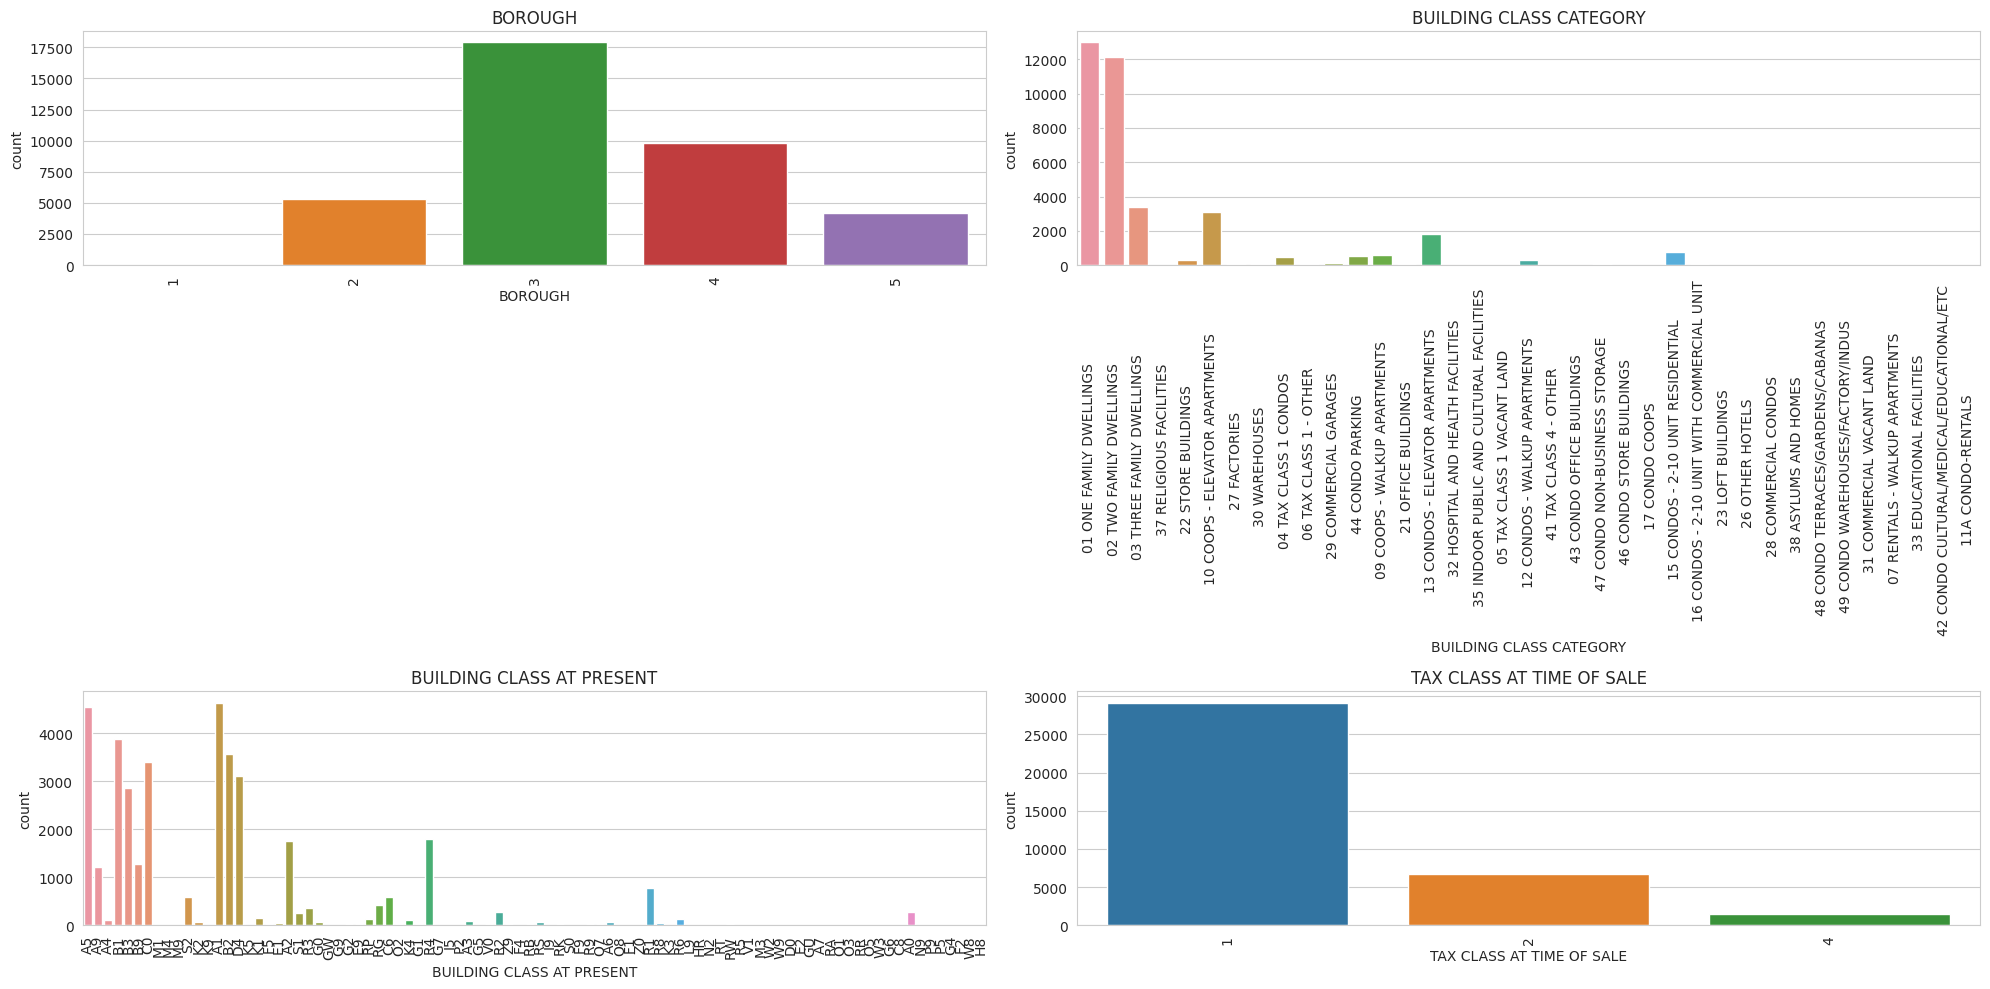

In [ ]:
categorical_variable = preprocessing_completed[['BOROUGH', 'BUILDING CLASS CATEGORY', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT TIME OF SALE', 'PRICE_B']]

fig, axes = plt.subplots(2,2, figsize=(20,10))

for i, col in enumerate(categorical_variable.columns[:-1]):
  sns.countplot(x=col, data=categorical_variable, ax=axes[i//2, i%2])
  axes[i//2, i%2].set_title(col)
  axes[i//2, i%2].tick_params(axis='x', rotation=90)

plt.tight_layout()

plt.show()

In [ ]:
# BOROUGH
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BOROUGH'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BOROUGH'], categorical_variable['PRICE_B'], normalize=True))

col_0    count
BOROUGH       
1           46
2         5314
3        17888
4         9785
5         4204

PRICE_B       0.0       1.0
BOROUGH                    
1        0.000242  0.000994
2        0.106346  0.036362
3        0.266267  0.214115
4        0.091414  0.171362
5        0.059914  0.052985


In [ ]:
# BUILDING CLASS CATEGORY
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS CATEGORY'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS CATEGORY'], categorical_variable['PRICE_B'], normalize=True))

col_0                                         count
BUILDING CLASS CATEGORY                            
01 ONE FAMILY DWELLINGS                       12991
02 TWO FAMILY DWELLINGS                       12164
03 THREE FAMILY DWELLINGS                      3410
04 TAX CLASS 1 CONDOS                           487
05 TAX CLASS 1 VACANT LAND                       34
06 TAX CLASS 1 - OTHER                           70
07 RENTALS - WALKUP APARTMENTS                    2
09 COOPS - WALKUP APARTMENTS                    588
10 COOPS - ELEVATOR APARTMENTS                 3121
11A CONDO-RENTALS                                10
12 CONDOS - WALKUP APARTMENTS                   285
13 CONDOS - ELEVATOR APARTMENTS                1798
15 CONDOS - 2-10 UNIT RESIDENTIAL               777
16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT       49
17 CONDO COOPS                                   30
21 OFFICE BUILDINGS                              77
22 STORE BUILDINGS                              322
23 LOFT BUIL

In [ ]:
# BUILDING CLASS AT PRESENT
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS AT PRESENT'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['BUILDING CLASS AT PRESENT'], categorical_variable['PRICE_B'], normalize=True))

col_0                      count
BUILDING CLASS AT PRESENT       
A0                           282
A1                          4637
A2                          1750
A3                            95
A4                           119
...                          ...
W3                             3
W8                             1
W9                             7
Z0                             2
Z9                            23

[90 rows x 1 columns]

PRICE_B                         0.0       1.0
BUILDING CLASS AT PRESENT                    
A0                         0.001584  0.005989
A1                         0.062921  0.061605
A2                         0.023606  0.023391
A3                         0.000591  0.001960
A4                         0.002148  0.001047
...                             ...       ...
W3                         0.000000  0.000081
W8                         0.000000  0.000027
W9                         0.000081  0.000107
Z0                         0.000054  0.00

In [ ]:
# BTAX CLASS AT TIME OF SALE
# frequency table 생성(개수 기준)
print(pd.crosstab(categorical_variable['TAX CLASS AT TIME OF SALE'], columns='count'))
print()

# frequency table 생성(비율 기준)
print(pd.crosstab(categorical_variable['TAX CLASS AT TIME OF SALE'], categorical_variable['PRICE_B'], normalize=True))

col_0                      count
TAX CLASS AT TIME OF SALE       
1                          29156
2                           6660
4                           1421

PRICE_B                         0.0       1.0
TAX CLASS AT TIME OF SALE                    
1                          0.393211  0.389774
2                          0.101190  0.077665
4                          0.029782  0.008379


구간 변수 t검정

In [ ]:
from scipy import stats
# TOTAL UNITS t-검정
data_TOTAL_UNITS_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['TOTAL UNITS']
data_TOTAL_UNITS_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['TOTAL UNITS']

stats.ttest_ind(data_TOTAL_UNITS_1, data_TOTAL_UNITS_0)

TtestResult(statistic=23.88786061735756, pvalue=3.593195777998719e-125, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 TOTAL UNITS는 서로 다르다

In [ ]:
# LAND SQUARE FEET t-검정
data_LAND_SQUARE_FEET_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['LAND SQUARE FEET']
data_LAND_SQUARE_FEET_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['LAND SQUARE FEET']

stats.ttest_ind(data_LAND_SQUARE_FEET_1, data_LAND_SQUARE_FEET_0)

TtestResult(statistic=29.880858084198113, pvalue=6.854317514392228e-194, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 LAND SQUARE FEET는 서로 다르다

In [ ]:
# GROSS SQUARE FEET t-검정
data_GROSS_SQUARE_FEET_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['GROSS SQUARE FEET']
data_GROSS_SQUARE_FEET_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['GROSS SQUARE FEET']

stats.ttest_ind(data_GROSS_SQUARE_FEET_1, data_GROSS_SQUARE_FEET_0)

TtestResult(statistic=20.416928314761886, pvalue=3.7863714204628153e-92, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 GROSS SQUARE FEET는 서로 다르다

In [ ]:
# YEAR BUILT t-검정
data_YEAR_BUILT_1 = interval_variable[categorical_variable['PRICE_B'] == 1]['YEAR BUILT']
data_YEAR_BUILT_0 = interval_variable[categorical_variable['PRICE_B'] == 0]['YEAR BUILT']

stats.ttest_ind(data_YEAR_BUILT_1, data_YEAR_BUILT_0)

TtestResult(statistic=5.921799667766853, pvalue=3.21225246051237e-09, df=37235.0)

pvalue가 0.05보다 작으므로 귀무가설 기각

두 그룹의 YEAR BUILT는 서로 다르다

In [ ]:
import pandas as pd
new_column_names = {
    'BOROUGH' : 'BOROUGH',
    'BUILDING CLASS CATEGORY' : 'BUILDING_CLASS_CATEGORY',
    'BUILDING CLASS AT PRESENT': 'BUILDING_CLASS_AT_PRESENT',
    'TOTAL UNITS': 'TOTAL_UNITS',
    'LAND SQUARE FEET': 'LAND_SQUARE_FEET',
    'GROSS SQUARE FEET': 'GROSS_SQUARE_FEET',
    'YEAR BUILT': 'YEAR_BUILT',
    'TAX CLASS AT TIME OF SALE': 'TAX_CLASS_AT_TIME_OF_SALE',
    'SALE PRICE': 'SALE_PRICE',
    'PRICE_B' : 'PRICE_B'
}

df = preprocessing_completed.rename(columns=new_column_names)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   BOROUGH                    37237 non-null  int64 
 1   BUILDING_CLASS_CATEGORY    37237 non-null  object
 2   BUILDING_CLASS_AT_PRESENT  37237 non-null  object
 3   TOTAL_UNITS                37237 non-null  int64 
 4   LAND_SQUARE_FEET           37237 non-null  int64 
 5   GROSS_SQUARE_FEET          37237 non-null  int64 
 6   YEAR_BUILT                 37237 non-null  int64 
 7   TAX_CLASS_AT_TIME_OF_SALE  37237 non-null  int64 
 8   SALE_PRICE                 37237 non-null  int64 
 9   PRICE_B                    37237 non-null  object
dtypes: int64(7), object(3)
memory usage: 2.8+ MB


In [ ]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv', index=False)

머신러닝 모델 수립


결정 트리, 로지스틱 회귀, 신경망 모델, K-최근접 이웃, 랜덤 포레스트, 그레디언트 부스팅, Lasso, SVM, XGBoost, LightGBM, 앙상블 등 여러 모델을 사용하여 가장 높은 정확도를 가지고 있는 모델 판별

머신 러닝 모델 실행

결정 트리 분류 모델

In [ ]:
!pip install -U imbalanced-learn
!pip install graphviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.6/235.6 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# OrdinalEncoder를 import 하여 범주형 데이터 변환
df_decisiontree = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data_Analysis/NYC Property Sales/preprocessing_completed.csv')

from sklearn.preprocessing import OrdinalEncoder
df_decisiontree['BOROUGH_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BOROUGH'].values.reshape(-1,1)) + 1
df_decisiontree['BUILDING_CLASS_CATEGORY_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BUILDING_CLASS_CATEGORY'].values.reshape(-1,1))
df_decisiontree['BUILDING_CLASS_AT_PRESENT_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['BUILDING_CLASS_AT_PRESENT'].values.reshape(-1,1))
df_decisiontree['TAX_CLASS_AT_TIME_OF_SALE_encoded'] = OrdinalEncoder().fit_transform(df_decisiontree['TAX_CLASS_AT_TIME_OF_SALE'].values.reshape(-1,1)) + 1
df_decisiontree.head(3)

,BOROUGH,BUILDING_CLASS_CATEGORY,BUILDING_CLASS_AT_PRESENT,TOTAL_UNITS,LAND_SQUARE_FEET,GROSS_SQUARE_FEET,YEAR_BUILT,TAX_CLASS_AT_TIME_OF_SALE,SALE_PRICE,PRICE_B,BOROUGH_encoded,BUILDING_CLASS_CATEGORY_encoded,BUILDING_CLASS_AT_PRESENT_encoded,TAX_CLASS_AT_TIME_OF_SALE_encoded
0,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
1,1,01 ONE FAMILY DWELLINGS,A5,1,384,1152,1901,1,1375000,1.0,1.0,0.0,5.0,1.0
2,1,01 ONE FAMILY DWELLINGS,A9,1,1665,3200,1910,1,1510000,1.0,1.0,0.0,8.0,1.0


In [ ]:
df_decisiontree.groupby(['BOROUGH', 'BOROUGH_encoded']).size()

BOROUGH  BOROUGH_encoded
1        1.0                   46
2        2.0                 5314
3        3.0                17888
4        4.0                 9785
5        5.0                 4204
dtype: int64

In [ ]:
df_decisiontree.groupby(['BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_CATEGORY_encoded']).size()

BUILDING_CLASS_CATEGORY                       BUILDING_CLASS_CATEGORY_encoded
01 ONE FAMILY DWELLINGS                       0.0                                12991
02 TWO FAMILY DWELLINGS                       1.0                                12164
03 THREE FAMILY DWELLINGS                     2.0                                 3410
04 TAX CLASS 1 CONDOS                         3.0                                  487
05 TAX CLASS 1 VACANT LAND                    4.0                                   34
06 TAX CLASS 1 - OTHER                        5.0                                   70
07 RENTALS - WALKUP APARTMENTS                6.0                                    2
09 COOPS - WALKUP APARTMENTS                  7.0                                  588
10 COOPS - ELEVATOR APARTMENTS                8.0                                 3121
11A CONDO-RENTALS                             9.0                                   10
12 CONDOS - WALKUP APARTMENTS                 10.0  

In [ ]:
df_decisiontree.groupby(['BUILDING_CLASS_AT_PRESENT', 'BUILDING_CLASS_AT_PRESENT_encoded']).size()

BUILDING_CLASS_AT_PRESENT  BUILDING_CLASS_AT_PRESENT_encoded
A0                         0.0                                   282
A1                         1.0                                  4637
A2                         2.0                                  1750
A3                         3.0                                    95
A4                         4.0                                   119
                                                                ... 
W3                         85.0                                    3
W8                         86.0                                    1
W9                         87.0                                    7
Z0                         88.0                                    2
Z9                         89.0                                   23
Length: 90, dtype: int64

In [ ]:
df_decisiontree.groupby(['TAX_CLASS_AT_TIME_OF_SALE', 'TAX_CLASS_AT_TIME_OF_SALE_encoded']).size()

TAX_CLASS_AT_TIME_OF_SALE  TAX_CLASS_AT_TIME_OF_SALE_encoded
1                          1.0                                  29156
2                          2.0                                   6660
4                          3.0                                   1421
dtype: int64

In [ ]:
# 기존 범주형 변수 열 삭제
df_decisiontree.drop(['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'BUILDING_CLASS_AT_PRESENT', 'TAX_CLASS_AT_TIME_OF_SALE'], axis=1, inplace=True)
df_decisiontree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37237 entries, 0 to 37236
Data columns (total 10 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   TOTAL_UNITS                        37237 non-null  int64  
 1   LAND_SQUARE_FEET                   37237 non-null  int64  
 2   GROSS_SQUARE_FEET                  37237 non-null  int64  
 3   YEAR_BUILT                         37237 non-null  int64  
 4   SALE_PRICE                         37237 non-null  int64  
 5   PRICE_B                            37237 non-null  float64
 6   BOROUGH_encoded                    37237 non-null  float64
 7   BUILDING_CLASS_CATEGORY_encoded    37237 non-null  float64
 8   BUILDING_CLASS_AT_PRESENT_encoded  37237 non-null  float64
 9   TAX_CLASS_AT_TIME_OF_SALE_encoded  37237 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.8 MB


In [ ]:
# 타겟 변수 분할 및 비율 확인
import graphviz
import pandas as pd
import numpy as np

print("df_decisiontree shape : " + str(df_decisiontree.shape))
data = df_decisiontree.drop(['SALE_PRICE', 'PRICE_B'], axis=1)
target = df_decisiontree['PRICE_B']
print("data shape : ", data.shape)
print("target shape : ", target.shape)
df_decisiontree['PRICE_B'].value_counts(dropna=False, normalize=True)

df_decisiontree shape : (37237, 10)
data shape :  (37237, 8)
target shape :  (37237,)


0.0    0.524183
1.0    0.475817
Name: PRICE_B, dtype: float64

In [ ]:
# 7:3 비율로 데이터 분할
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=4, stratify=target)
print("x_train shape : ", x_train.shape)
print("x_test shape : ", x_test.shape)
print("y_train shape : ", y_train.shape)
print("y_test shape : ", y_test.shape)
y_train.value_counts(normalize=True)

x_train shape :  (26065, 8)
x_test shape :  (11172, 8)
y_train shape :  (26065,)
y_test shape :  (11172,)


0.0    0.52419
1.0    0.47581
Name: PRICE_B, dtype: float64

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Classifier로 DecisionTreeClassifier를 지정
tree = DecisionTreeClassifier(random_state=4)
# Classifier를 학습 데이터세트에서 학습시킴
model = tree.fit(x_train, y_train)
# 학습된 Classifier로 테스트데이터세트의 자료를 이용해서 타겟 변수 예측값을 생성
pred = model.predict(x_test)

print("Accuracy on training set : {:.5f}".format(model.score(x_train, y_train)))
print("Accuracy on test set : {:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on training set : 0.93532
Accuracy on test set : 0.64599


GridSearch를 실행하기 전 정확도 : 0.64599

In [ ]:
# 결정 트리 모델(지니 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=4, max_depth=5)

params = {'criterion':['gini', 'entropy'], 'max_depth':range(1, 21)}
grid_tree = GridSearchCV(
    tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1, verbose=1)
grid_tree.fit(x_train, y_train)

print("GridSearchCV max accuracy : {:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy : 0.67873
GridSearchCV best parameter: {'criterion': 'entropy', 'max_depth': 8}


In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(x_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.67168


GridSearch를 실행한 후 데스트 데이터세트의 정확도 : 0.67168

bets parameter : {'criterion': 'entropy', 'max_depth': 8}

In [ ]:
# 최적 모델의 변수 중요도 수치 확인
print("Feature importances:")
print(best_clf.feature_importances_)

Feature importances:
[0.05283955 0.13478467 0.21893692 0.23696183 0.24583416 0.07768933
 0.03295353 0.        ]


In [ ]:
# 변수명을 리스트 형태로 만들기
feature_names = list(data.columns)
# 변수명을 index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names, columns=['Feature_importances'])
# Feature_importances의 값을 내림차순으로 정리
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1

,Feature_importances
BOROUGH_encoded,0.2458
YEAR_BUILT,0.2370
GROSS_SQUARE_FEET,0.2189
LAND_SQUARE_FEET,0.1348
BUILDING_CLASS_CATEGORY_encoded,0.0777
TOTAL_UNITS,0.0528
BUILDING_CLASS_AT_PRESENT_encoded,0.0330
TAX_CLASS_AT_TIME_OF_SALE_encoded,0.0000


<Axes: xlabel='Feature_importances'>

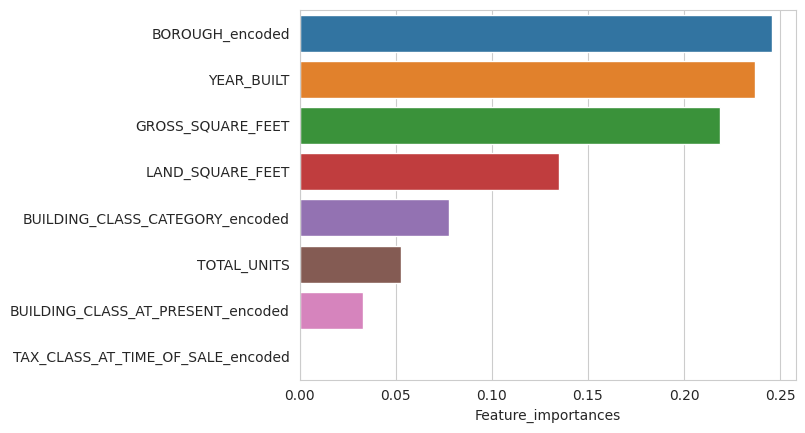

In [ ]:
# 데이터프레임 df1의 막대그래프 그리기
import seaborn as sns

sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

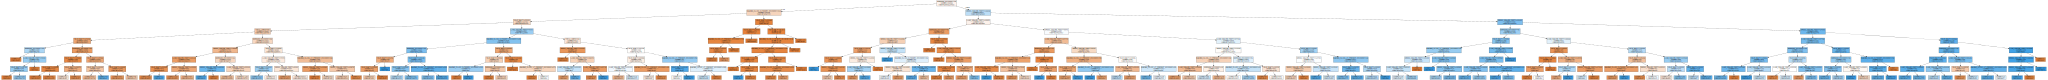

In [ ]:
# graphviz 불러오기
import graphviz
# model의 결과물을 tree.dot에 저장
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file="tree.dot", feature_names=list(data.columns), impurity=False, filled=True)

# tree.dot을 graphviz 기능을 통해 출력
with open("tree.dot") as f:
  dot_graph = f.read()
display(graphviz.Source(dot_graph))

로지스틱 회귀 분류 모델